# Question 1 – Traditional Machine Learning Approach

In this notebook, we explore the Fashion-MNIST dataset and apply a **traditional
(non-neural network) machine learning model** to a multi-class image classification task.
This model will later be compared with neural network approaches in Question 2.

## Problem Definition

The task is a **multi-class classification problem**.
Each data point is a 28×28 grayscale image of a clothing item, flattened into 784 pixel values.
The goal is to predict the correct clothing category label from these pixel intensities.


In [15]:
import sys
sys.path.append("..")

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from functions import get_data, data_split_train_val, show_samples

## Dataset Description

Fashion-MNIST is a widely used benchmark dataset containing grayscale images
of clothing items such as T-shirts, trousers, and shoes.
It is suitable for comparing traditional machine learning models with neural networks
due to its high dimensionality and visual class similarity.


In [16]:
df = pd.read_csv("../data/fashion-mnist_test.csv")

df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Class Labels

The Fashion-MNIST dataset contains 10 clothing categories,
encoded as integer labels:

| Label | Class Name      |
|------:|-----------------|
| 0     | T-shirt / top   |
| 1     | Trouser         |
| 2     | Pullover        |
| 3     | Dress           |
| 4     | Coat            |
| 5     | Sandal          |
| 6     | Shirt           |
| 7     | Sneaker         |
| 8     | Bag             |
| 9     | Ankle boot      |

These classes include visually similar categories (e.g. *Shirt*, *T-shirt*, *Pullover*),
which makes the classification task challenging for traditional machine learning models.


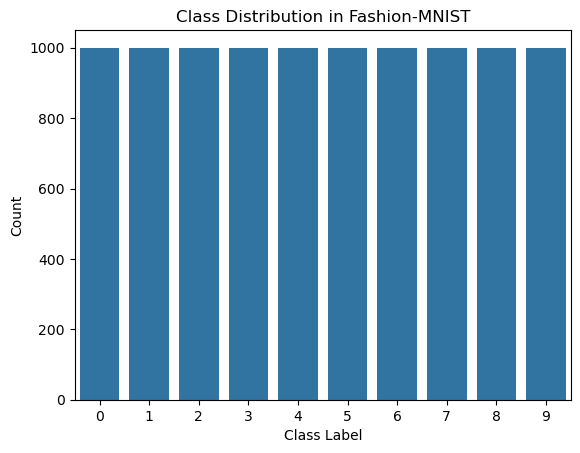

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df["label"])
plt.title("Class Distribution in Fashion-MNIST")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

The dataset is approximately balanced across classes,
making accuracy an appropriate evaluation metric.

In [18]:
X, y = get_data("../data/fashion-mnist_test.csv")

X_train, X_val, y_train, y_val = data_split_train_val(X, y)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)


Train shape: (8000, 784)
Validation shape: (2000, 784)


Pixel values are normalised to the range [0, 1].
The dataset is split into training and validation sets
to evaluate model generalisation.

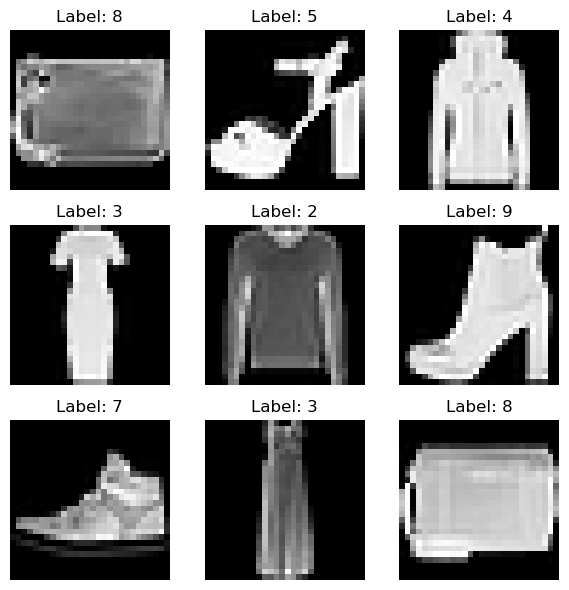

In [20]:
show_samples(X_train, y_train, n=9)

The figure above shows randomly selected training images.
Several classes are visually similar, increasing classification difficulty
and motivating the use of more advanced models.



## Choice of Model: Random Forest

A Random Forest classifier is used as a traditional machine learning baseline because:
- It handles high-dimensional feature spaces well
- It models non-linear decision boundaries
- It is robust compared to single decision trees

Images are flattened into feature vectors, as traditional models
cannot exploit spatial structure.


In [22]:
rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=1
)

# Train the model
rf_clf.fit(X_train, y_train)

# Training and validation accuracy 
train_accuracy = rf_clf.score(X_train, y_train)
val_accuracy = rf_clf.score(X_val, y_val)

print("Training accuracy:", train_accuracy)
print("Validation accuracy:", val_accuracy)

Training accuracy: 1.0
Validation accuracy: 0.8575


The Random Forest achieves perfect training accuracy, indicating overfitting.
This is expected due to the large number of input features (784 pixels)
and the flexibility of ensemble tree-based models.

Despite this, the validation accuracy remains high,
demonstrating reasonable generalisation and providing
a strong baseline for comparison with neural networks.


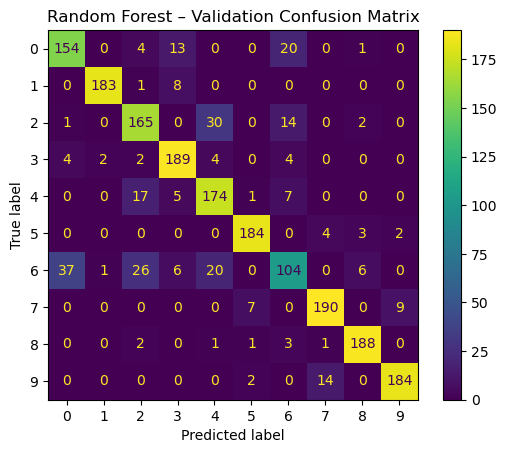

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rf_clf, X_val, y_val)

plt.title("Random Forest – Validation Confusion Matrix")
plt.show()


The confusion matrix shows that misclassifications
often occur between visually similar clothing categories,
highlighting the limitations of traditional models on image data.
